In [20]:
import numpy as np
import tifffile
import pandas as pd
from skimage import exposure, img_as_ubyte
from matplotlib import pyplot as plt
import cv2

In [9]:
# wczytanie ścieżek do plików
file_red = 'dataset/rgb/Centr_tel Brachy/Experiment-392.czi - C=r.tif'
file_green = 'dataset/rgb/Centr_tel Brachy/Experiment-392.czi - C=g.tif'
file_blue = 'dataset/rgb/Centr_tel Brachy/Experiment-392.czi - C=b.tif'

# wczytanie plików TIFF przy użyciu biblioteki tifffile
tif_red = tifffile.imread(file_red)
tif_green = tifffile.imread(file_green)
tif_blue = tifffile.imread(file_blue)

In [14]:
DAPI = tif_blue[0]

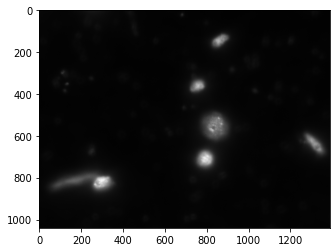

In [26]:
plt.imshow(DAPI, cmap='gray')

In [15]:
DAPI

array([[1239, 1243, 1187, ...,  867,  867,  947],
       [1211, 1207, 1203, ...,  863,  875,  867],
       [1207, 1187, 1227, ...,  867,  867,  895],
       ...,
       [ 959,  971,  943, ...,  967,  923,  939],
       [ 983,  959,  907, ...,  939,  907,  967],
       [ 963,  947,  947, ...,  975,  975,  935]], dtype=uint16)

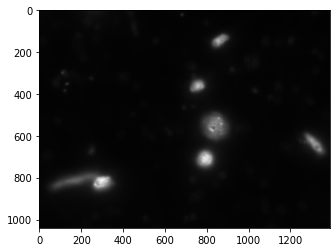

In [16]:
############# PROPER WAY(S) ###################
#Normalize then scale to 255 and convert to uint8 - manual
DAPI_8bit_c = (DAPI / DAPI.max()) * 255.
DAPI_8bit_c = np.uint8(DAPI_8bit_c)
plt.imshow(DAPI_8bit_c, cmap='gray')

In [21]:
DAPI_8bit_c

array([[23, 24, 22, ..., 16, 16, 18],
       [23, 23, 23, ..., 16, 16, 16],
       [23, 22, 23, ..., 16, 16, 17],
       ...,
       [18, 18, 18, ..., 18, 17, 18],
       [19, 18, 17, ..., 18, 17, 18],
       [18, 18, 18, ..., 18, 18, 18]], dtype=uint8)

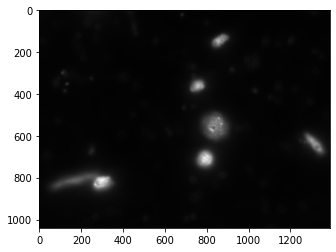

In [22]:
#Normalize then scale to 255 and convert to uint8 - using opencv
DAPI_8bit_d = cv2.normalize(DAPI, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
plt.imshow(DAPI_8bit_d, cmap='gray')

In [23]:
DAPI_8bit_d

array([[10, 10,  9, ...,  2,  2,  4],
       [ 9,  9,  9, ...,  2,  2,  2],
       [ 9,  9,  9, ...,  2,  2,  3],
       ...,
       [ 4,  4,  4, ...,  4,  3,  4],
       [ 4,  4,  3, ...,  4,  3,  4],
       [ 4,  4,  4, ...,  4,  4,  3]], dtype=uint8)

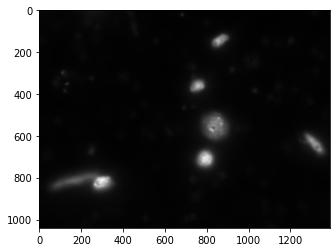

In [24]:
#Normalize then scale to 255 and convert to uint8 - using skimage
from skimage import exposure, img_as_ubyte
#exposure.rescale_intensity stretches (scales) intensity to min and max 
# of the dtype of the image. In our case: 0 to 65535
DAPI_8bit_e = img_as_ubyte(exposure.rescale_intensity(DAPI))
plt.imshow(DAPI_8bit_e, cmap='gray')

In [25]:
DAPI_8bit_e

array([[9, 9, 8, ..., 2, 2, 3],
       [9, 9, 8, ..., 1, 2, 2],
       [9, 8, 9, ..., 2, 2, 2],
       ...,
       [3, 4, 3, ..., 4, 3, 3],
       [4, 3, 2, ..., 3, 2, 4],
       [4, 3, 3, ..., 4, 4, 3]], dtype=uint8)

In [27]:
DAPI.max()

13183

In [57]:
print(tif_red.min(),tif_red.max(),tif_green.min(),tif_green.max(),tif_blue.min(),tif_blue.max())

2715 16383 943 16383 707 14999


In [58]:
for layer in tif_blue:
    
    print(layer.min(),layer.max())

767 13183
775 13035
759 13007
767 13179
767 13543
759 14331
755 14711
751 14955
735 14999
743 14711
743 14567
743 14415
735 14047
727 13463
731 12995
731 12559
707 12287
735 11767


In [59]:
for layer in tif_red:
    
    print(layer.min(),layer.max())

2999 15751
2951 15475
2919 15919
2963 16383
2903 16383
2867 16383
2839 16383
2839 16383
2823 16383
2783 16383
2799 16383
2795 16383
2767 16383
2755 16383
2715 16383
2743 16383
2719 10439
2723 9911


In [60]:
for layer in tif_green:
    
    print(layer.min(),layer.max())

1115 9091
1091 8559
1075 9083
1099 10955
1083 11871
1063 11911
1055 15263
1043 16383
1031 16383
1007 16383
1003 16383
1003 16383
991 16383
987 16383
975 11207
943 9443
959 7563
959 6767


In [56]:
# wczytanie ścieżek do plików
file_red = 'dataset/rgb/Centr_tel Brachy/Experiment-392.czi - C=r.tif'
file_green = 'dataset/rgb/Centr_tel Brachy/Experiment-392.czi - C=g.tif'
file_blue = 'dataset/rgb/Centr_tel Brachy/Experiment-392.czi - C=b.tif'

# wczytanie plików TIFF przy użyciu biblioteki tifffile
tif_red = tifffile.imread(file_red)
tif_green = tifffile.imread(file_green)
tif_blue = tifffile.imread(file_blue)

In [61]:
tif_red_norm2 = img_as_ubyte(exposure.rescale_intensity(tif_red))
tif_green_norm2 = img_as_ubyte(exposure.rescale_intensity(tif_green))
tif_blue_norm2 = img_as_ubyte(exposure.rescale_intensity(tif_blue))

In [62]:
tif_red_norm = np.empty(shape=(18, 1040,1388), dtype='uint8')
tif_green_norm = np.empty(shape=(18, 1040,1388), dtype='uint8')
tif_blue_norm = np.empty(shape=(18, 1040,1388), dtype='uint8')

# normalizacja
for i in range(0,tif_blue.shape[0]):
    tif_red_norm[i] = img_as_ubyte(exposure.rescale_intensity(tif_red[i]))
    tif_green_norm[i] = img_as_ubyte(exposure.rescale_intensity(tif_green[i]))
    tif_blue_norm[i] = img_as_ubyte(exposure.rescale_intensity(tif_blue[i]))

In [63]:
tif_green_norm[17]

array([[22, 23, 23, ..., 10,  9,  9],
       [21, 23, 23, ...,  8, 12,  6],
       [24, 25, 20, ...,  7,  4,  7],
       ...,
       [25, 22, 23, ..., 23, 24, 22],
       [18, 21, 21, ..., 27, 22, 24],
       [23, 20, 19, ..., 26, 26, 24]], dtype=uint8)

In [64]:
tif_green_norm2[17]

array([[ 8,  9,  9, ...,  4,  3,  3],
       [ 8,  9,  9, ...,  3,  5,  2],
       [ 9,  9,  8, ...,  3,  2,  3],
       ...,
       [10,  8,  9, ...,  9,  9,  8],
       [ 7,  8,  8, ..., 10,  8,  9],
       [ 9,  8,  7, ..., 10, 10,  9]], dtype=uint8)

In [65]:
tifffile.imwrite('norm1_green.tif', tif_green_norm)
tifffile.imwrite('norm1_red.tif', tif_red_norm)
tifffile.imwrite('norm1_blue.tif', tif_blue_norm)

In [66]:
tifffile.imwrite('norm2_green.tif', tif_green_norm2)